## seting up directories

In [1]:
import hydra
from src.datamodules.components.data_utils import *
from src.vendor.auto_umap import OfflineUMAP
%matplotlib inline

original_dir = os.getcwd()
original_dir = original_dir.split("\\")
original_dir = '\\'.join(original_dir[:-1])

data_dir = original_dir + '\data\Exact\\'
data_file = 'Exact_UVA_patches_400_100_100_indivPatchesNames_03-16-2022.mat'
print(data_dir)


C:\Users\Mahdi\Desktop\Shared_folder\OneDrive_Queens_University\Project_codes\SSLmicroUltrasound\data\Exact\


## instantiating datamodule

In [2]:
hydra.core.global_hydra.GlobalHydra.instance().clear()
with hydra.initialize(config_path="../configs"):
    cfg = hydra.compose(overrides=["+datamodule=exact_datamodule"], return_hydra_config=True)
    # print(cfg)

In [3]:
cfg.datamodule.data_dir = data_dir
# cfg.datamodule.dataset_hyp.inv_cutoff = .9

In [4]:
datamodule = hydra.utils.instantiate(cfg.datamodule)
datamodule.prepare_data()
datamodule.setup()

loading meta data...
meta data loaded.


C:\Users\Mahdi\Desktop\Shared_folder\OneDrive_Queens_University\Project_codes\SSLmicroUltrasound\src\datamodules\components\data_utils.py:94: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  meta_data[k_target] = np.array(target[k_target]).astype(np.ndarray)


## instantiating model and loading from checkpoint

In [5]:
with hydra.initialize(config_path="../configs"):
    cfg = hydra.compose(overrides=["+model=UMAP_vicreg.yaml"], return_hydra_config=True)

In [6]:
ckpt_path = original_dir + '/logs/experiments/runs/vicreg_online-eval_augpr.4-intes/2022-04-27_16-27-15/checkpoints/epoch_020.ckpt'

In [7]:
model = hydra.utils.instantiate(cfg.model)
model.load_from_checkpoint(ckpt_path, strict=False)

C:\Users\Mahdi\anaconda3\envs\ssl_env\lib\site-packages\torch\nn\init.py:403: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
C:\Users\Mahdi\Desktop\Shared_folder\OneDrive_Queens_University\Project_codes\SSLmicroUltrasound\src\models\self_supervised\exact_ssl_module.py:119: UserWarning: Using scheduler_interval=step might generate issues when resuming a checkpoint.
  warnings.warn(


VICReg(
  (val_loss_best): MinMetric()
  (backbone): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (layer2): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn1):

Creating UMAP


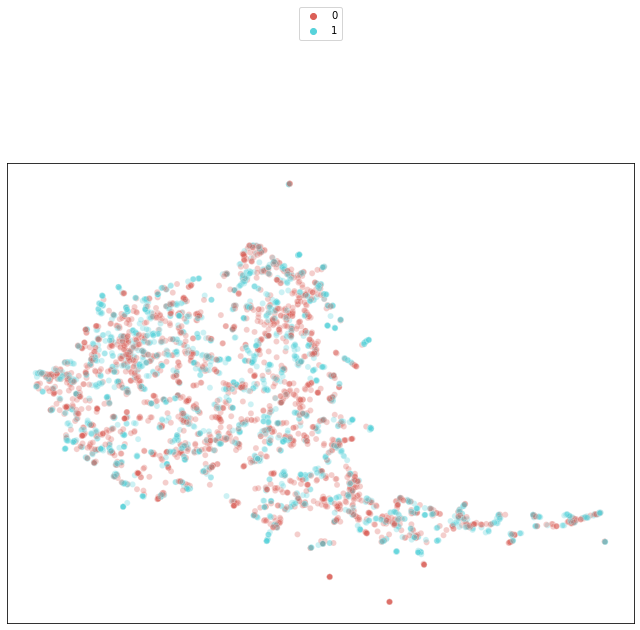

Creating UMAP


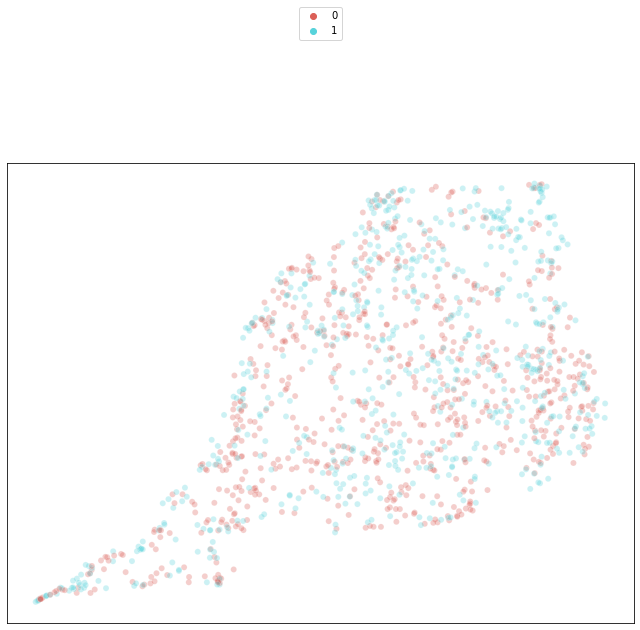

Creating UMAP


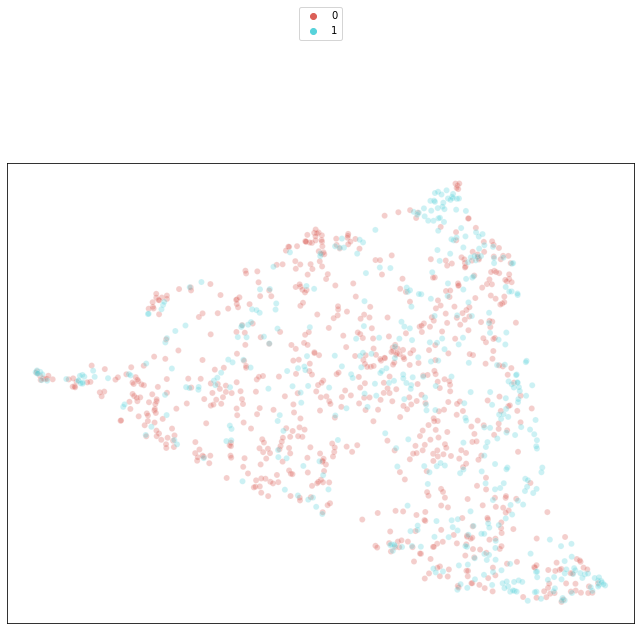

In [8]:
umap = OfflineUMAP()

# move model to the gpu
device = "cuda:0"
model = model.to(device)

train_loader = datamodule.train_dataloader()
val_loader, test_loader = datamodule.val_dataloader()

umap.plot(device, model, train_loader, 'train_Benign-Cancer_umap.pdf')
umap.plot(device, model, val_loader, 'val_Benign-Cancer_umap.pdf')
umap.plot(device, model, test_loader, 'test_Benign-Cancer_umap.pdf')